In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

air_pollution = pd.read_csv("Desktop/서울시 대기오염/대기오염 측정.csv", encoding='cp949')
center = pd.read_csv("Desktop/서울시 대기오염/대기오염 측정소.csv", encoding = 'cp949')
item = pd.read_csv("Desktop/서울시 대기오염/대기오염 측정항목.csv", encoding = 'cp949')

In [2]:
# scatter plot으로 각 행정구역 별로 확인하기 위해 서울시 행정구역의 중심 좌표 추가

center['위도'] = [37.5949173193145, 37.5601435645512, 37.5313849658815, 37.6192112825748, 
                  37.5777853091699, 37.559313492554, 37.5510296891344, 37.5467202379314,
                  37.581956547893, 37.5978173799249, 37.6057019023968, 37.6434739135586,
                  37.6691020802884, 37.65251104799, 37.5247894102082, 37.5612354280122,
                  37.4944054285618, 37.4605675649317, 37.5223082885753, 37.4988768760718,
                  37.4673756905879, 37.4732954673459, 37.4966438942877, 37.5056192415444, 37.5504502432305]

center['경도'] = [126.977321294872, 126.995968139707, 126.979906988235, 126.927022877199, 
                  126.939063095715, 126.908270027449, 127.041058533321, 127.085744097681,
                  127.054848127807, 127.092883176298, 127.017579491168, 127.011188975239,
                  127.032368819558, 127.075034689337, 126.855477660234, 126.822806689705,
                  126.856300578972, 126.900820244409, 126.910169467376, 126.951641454383,
                  126.94533715305, 127.031220311114, 127.062985204247, 127.115295039723, 127.147011841765]

center.head()

,측정소 코드,측정소 이름,측정소 주소,표시 순서,공인코드,위도,경도
0,101,종로구,서울 종로구 종로35가길 19 종로56가 동 주민센터,1,111123,37.594917,126.977321
1,102,중구,서울 중구 덕수궁길 15 시청서소문별관 3동,2,111121,37.560144,126.995968
2,103,용산구,서울 용산구 한남대로 136 서울특별시중부기술교육원,3,111131,37.531385,126.979907
3,104,은평구,서울 은평구 진흥로 215 (한국환경산업기술원 온실동2층 ),4,111181,37.619211,126.927023
4,105,서대문구,서울 서대문구 세검정로4길 32(홍제3동 주민센터),5,111191,37.577785,126.939063


In [3]:
# 측정기 상태 : "0" : 정상 “1” : 교정,“2”: 비정상,“4” : 전원단절 ,“8” : 보수중,“9” : 자료이상
# 국가 기준초과 구분 : “0”: 정상, “1” : 초과
# 지자체 기준초과 구분 : “0”: 정상, “1” : 초과

air_pollution.head()

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,저장일시
0,20220331160000,121,9,5.000,0,0,0,20220331170331
1,20220331160000,121,8,12.000,0,0,0,20220331170331
2,20220331160000,121,6,0.046,0,0,0,20220331170331
3,20220331160000,121,5,0.300,0,0,0,20220331170331
4,20220331160000,121,1,0.002,0,0,0,20220331170331


In [4]:
item

,측정항목 코드,측정항목 명(줄임 명칭),통신기호,측정단위,화면 정렬 순서,사용여부,메인화면 표시,소수점 자리 수,범례-파랑,범례-녹색,범례-노랑,범례-빨강
0,1,SO2,SO2,ppm,10,Y,Y,3,0.02,0.05,0.15,1.0
1,3,NO2,NO2,ppm,6,Y,Y,3,0.03,0.06,0.20,2.0
2,5,CO,COb,ppm,8,Y,Y,1,2.00,9.00,15.00,50.0
3,6,O3,O3b,ppm,9,Y,Y,3,0.03,0.09,0.15,0.5
4,8,PM10,PMb,㎍/㎥,2,Y,Y,0,30.00,80.00,150.00,600.0
5,9,PM2.5,PM2,㎍/㎥,1,Y,Y,0,15.00,35.00,75.00,500.0


In [5]:
# 대기의 종류를 쉽게 보기 위해 assign을 통해 측정항목이라는 새로운 컬럼 생성

item = item.assign(측정항목 = ["아황산가스", "이산화질소", "일산화탄소",
                               "오존", "미세먼지", "초미세먼지"])

In [6]:
# 필요없는 데이터 전부 drop

air_pollution.drop(["저장일시"], axis = 1, inplace = True)

center.drop(["측정소 주소", "표시 순서", "공인코드"], axis = 1, inplace = True)

item.drop(['측정항목 명(줄임 명칭)', '통신기호', '측정단위', '화면 정렬 순서', '사용여부', '메인화면 표시', '소수점 자리 수'], axis = 1, inplace = True)

In [7]:
item

,측정항목 코드,범례-파랑,범례-녹색,범례-노랑,범례-빨강,측정항목
0,1,0.02,0.05,0.15,1.0,아황산가스
1,3,0.03,0.06,0.20,2.0,이산화질소
2,5,2.00,9.00,15.00,50.0,일산화탄소
3,6,0.03,0.09,0.15,0.5,오존
4,8,30.00,80.00,150.00,600.0,미세먼지
5,9,15.00,35.00,75.00,500.0,초미세먼지


In [8]:
# 측정소 코드를 기준으로 air_pollution과 center를 inner join

air_pollution = pd.merge(left = air_pollution, right = center, how = 'inner', on = '측정소 코드')

In [9]:
air_pollution

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도
0,20220331160000,121,9,5.000,0,0,0,관악구,37.467376,126.945337
1,20220331160000,121,8,12.000,0,0,0,관악구,37.467376,126.945337
2,20220331160000,121,6,0.046,0,0,0,관악구,37.467376,126.945337
3,20220331160000,121,5,0.300,0,0,0,관악구,37.467376,126.945337
4,20220331160000,121,1,0.002,0,0,0,관악구,37.467376,126.945337
...,...,...,...,...,...,...,...,...,...,...
639995,20201005090000,102,9,8.000,0,0,0,중구,37.560144,126.995968
639996,20201005090000,102,1,0.003,0,0,0,중구,37.560144,126.995968
639997,20201005090000,102,6,0.021,0,0,0,중구,37.560144,126.995968
639998,20201005090000,102,3,0.014,0,0,0,중구,37.560144,126.995968


In [10]:
# 측정항목 코드를 기준으로 air_pollution과 item를 inner join

air_pollution = pd.merge(left = air_pollution, right = item, how = 'inner', on = '측정항목 코드')

In [11]:
air_pollution

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,범례-파랑,범례-녹색,범례-노랑,범례-빨강,측정항목
0,20220331160000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,15.00,35.00,75.0,500.0,초미세먼지
1,20220331150000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,15.00,35.00,75.0,500.0,초미세먼지
2,20220331140000,121,9,9.000,0,0,0,관악구,37.467376,126.945337,15.00,35.00,75.0,500.0,초미세먼지
3,20220331130000,121,9,6.000,0,0,0,관악구,37.467376,126.945337,15.00,35.00,75.0,500.0,초미세먼지
4,20220331120000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,15.00,35.00,75.0,500.0,초미세먼지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639995,20201005130000,102,3,0.005,0,0,0,중구,37.560144,126.995968,0.03,0.06,0.2,2.0,이산화질소
639996,20201005120000,102,3,0.006,0,0,0,중구,37.560144,126.995968,0.03,0.06,0.2,2.0,이산화질소
639997,20201005110000,102,3,0.007,0,0,0,중구,37.560144,126.995968,0.03,0.06,0.2,2.0,이산화질소
639998,20201005100000,102,3,0.011,0,0,0,중구,37.560144,126.995968,0.03,0.06,0.2,2.0,이산화질소


In [14]:
# grade라는 새로운 컬럼과 데이터를 추가하기 위해
# air_pollution의 평균값 컬럼과 범례를 비교하여
# grade 컬럼에 blue, green, yellow, red 데이터를 생성

def new_col(x):
    grade = ''
    if x["평균값"] < x["범례-파랑"]: 
        grade = "blue"
    elif x["평균값"] < x["범례-녹색"]: 
        grade = "green"
    elif x["평균값"] < x["범례-노랑"]: 
        grade = 'yellow'
    else: 
        grade = 'red'
    return grade

In [15]:
# 위 함수를 lambda에 적용

air_pollution["grade"] = air_pollution.apply(lambda x: new_col(x), axis = 1)

In [16]:
air_pollution['grade'].value_counts()

blue      432757
green     171079
yellow     33307
red         2857
Name: grade, dtype: int64

In [17]:
# 범례 컬럼 삭제

air_pollution.drop(['범례-파랑', '범례-녹색', '범례-노랑', '범례-빨강'], axis = 1, inplace = True)
air_pollution

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
0,20220331160000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,초미세먼지,blue
1,20220331150000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,초미세먼지,blue
2,20220331140000,121,9,9.000,0,0,0,관악구,37.467376,126.945337,초미세먼지,blue
3,20220331130000,121,9,6.000,0,0,0,관악구,37.467376,126.945337,초미세먼지,blue
4,20220331120000,121,9,5.000,0,0,0,관악구,37.467376,126.945337,초미세먼지,blue
...,...,...,...,...,...,...,...,...,...,...,...,...
639995,20201005130000,102,3,0.005,0,0,0,중구,37.560144,126.995968,이산화질소,blue
639996,20201005120000,102,3,0.006,0,0,0,중구,37.560144,126.995968,이산화질소,blue
639997,20201005110000,102,3,0.007,0,0,0,중구,37.560144,126.995968,이산화질소,blue
639998,20201005100000,102,3,0.011,0,0,0,중구,37.560144,126.995968,이산화질소,blue


In [18]:
# 정리한 데이터가 63.5MB로 큰 용량을 가지고 있다.
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640000 entries, 0 to 639999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   측정일시         640000 non-null  int64  
 1   측정소 코드       640000 non-null  int64  
 2   측정항목 코드      640000 non-null  int64  
 3   평균값          640000 non-null  float64
 4   측정기 상태       640000 non-null  int64  
 5   국가 기준초과 구분   640000 non-null  int64  
 6   지자체 기준초과 구분  640000 non-null  int64  
 7   측정소 이름       640000 non-null  object 
 8   위도           640000 non-null  float64
 9   경도           640000 non-null  float64
 10  측정항목         640000 non-null  object 
 11  grade        640000 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 63.5+ MB


In [19]:
# 소수점 자리를 확인하기 위한 describe함수
air_pollution.describe()

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,위도,경도
count,6.400000e+05,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000
mean,2.021076e+13,112.991648,5.330337,-1.044397,0.081352,0.039772,0.039817,37.553862,126.989442
std,9.547272e+09,7.211784,2.748836,351.919387,0.784954,0.195423,0.195530,0.056673,0.084712
min,2.020082e+13,101.000000,1.000000,-9999.000000,0.000000,0.000000,0.000000,37.460568,126.822807
25%,2.020112e+13,107.000000,3.000000,0.012000,0.000000,0.000000,0.000000,37.505619,126.927023
50%,2.022010e+13,113.000000,5.000000,0.069000,0.000000,0.000000,0.000000,37.551030,126.995968
75%,2.022022e+13,119.000000,8.000000,17.000000,0.000000,0.000000,0.000000,37.594917,127.054848
max,2.022033e+13,125.000000,9.000000,1985.000000,9.000000,1.000000,1.000000,37.669102,127.147012


In [20]:
# 측정일시를 str로 한 이유는 datetime을 적용하여 시계열로 만들기 위함
# 나머지 데이터는 자릿 수와 category이기에 알맞게 변경

air_pollution = air_pollution.astype({'측정일시':str, '측정소 코드':np.int8, '측정항목 코드':np.int8, '평균값':np.float16, 
                                      '측정기 상태':np.int8, '국가 기준초과 구분':np.int8, '지자체 기준초과 구분':np.int8,
                                      '위도':np.float32, '경도':np.float32, '측정소 이름':'category', '측정항목':'category', 'grade':'category'})

In [21]:
# 20.8MB로 줄었다

air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640000 entries, 0 to 639999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   측정일시         640000 non-null  object  
 1   측정소 코드       640000 non-null  int8    
 2   측정항목 코드      640000 non-null  int8    
 3   평균값          640000 non-null  float16 
 4   측정기 상태       640000 non-null  int8    
 5   국가 기준초과 구분   640000 non-null  int8    
 6   지자체 기준초과 구분  640000 non-null  int8    
 7   측정소 이름       640000 non-null  category
 8   위도           640000 non-null  float32 
 9   경도           640000 non-null  float32 
 10  측정항목         640000 non-null  category
 11  grade        640000 non-null  category
dtypes: category(3), float16(1), float32(2), int8(5), object(1)
memory usage: 20.8+ MB


In [22]:
air_pollution.head()

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
0,20220331160000,121,9,5.0,0,0,0,관악구,37.467377,126.945335,초미세먼지,blue
1,20220331150000,121,9,5.0,0,0,0,관악구,37.467377,126.945335,초미세먼지,blue
2,20220331140000,121,9,9.0,0,0,0,관악구,37.467377,126.945335,초미세먼지,blue
3,20220331130000,121,9,6.0,0,0,0,관악구,37.467377,126.945335,초미세먼지,blue
4,20220331120000,121,9,5.0,0,0,0,관악구,37.467377,126.945335,초미세먼지,blue


In [23]:
# to_datetime으로 측정일시를 date형으로 변경
# set_index를 통해 측정일시 index로 변경

air_pollution['측정일시'] = pd.to_datetime(air_pollution['측정일시'])
air_pollution = air_pollution.set_index('측정일시')

In [24]:
# 정렬이 제대로 되어 있지 않아
#sort_index를 통해 내림차순으로 정렬

air_pollution = air_pollution.sort_index(ascending = True)
air_pollution

,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
측정일시,,,,,,,,,,,
2020-08-21 16:00:00,107,3,0.005001,9,0,0,성동구,37.551029,127.041061,이산화질소,blue
2020-08-21 17:00:00,107,3,0.004002,9,0,0,성동구,37.551029,127.041061,이산화질소,blue
2020-08-21 18:00:00,107,3,0.004002,9,0,0,성동구,37.551029,127.041061,이산화질소,blue
2020-08-21 19:00:00,107,3,0.003000,9,0,0,성동구,37.551029,127.041061,이산화질소,blue
2020-08-21 20:00:00,107,3,0.003000,9,0,0,성동구,37.551029,127.041061,이산화질소,blue
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 16:00:00,125,9,5.000000,0,0,0,강동구,37.550449,127.147011,초미세먼지,blue
2022-03-31 16:00:00,119,1,0.002001,0,0,0,영등포구,37.522308,126.910172,아황산가스,blue
2022-03-31 16:00:00,121,1,0.002001,0,0,0,관악구,37.467377,126.945335,아황산가스,blue


In [25]:
# groupby를 통해 측정소 이름과 측정항목의 그룹을 만든 뒤
# isin을 통해 보고 싶은 행정구역만 가져오기

air_pollution_group1 = (air_pollution
                        .groupby(['측정소 이름', '측정항목'], as_index = False)
                        .agg({'평균값':['min', 'max', 'mean']})
                       )
air_pollution_group1
air_pollution_group1[air_pollution_group1['측정소 이름'].isin(['강남구', '영등포구', '중구', '강서구'])]

측정소 이름   측정항목           평균값                       
                            min         max       mean
0      강남구   미세먼지    -76.000000  422.000000  37.656250
1      강남구  아황산가스      0.002001    0.196045   0.003805
2      강남구     오존      0.001000    0.145020   0.019745
3      강남구  이산화질소      0.002001    0.088989   0.028366
4      강남구  일산화탄소      0.199951   19.500000   0.555176
5      강남구  초미세먼지    -13.000000  425.000000  23.593750
18     강서구   미세먼지 -10000.000000  371.000000  21.406250
19     강서구  아황산가스 -10000.000000    0.114990 -14.085938
20     강서구     오존 -10000.000000    0.080017 -14.070312
21     강서구  이산화질소 -10000.000000    0.086975 -14.062500
22     강서구  일산화탄소 -10000.000000   11.796875 -13.625000
23     강서구  초미세먼지 -10000.000000  215.000000   2.457031
114   영등포구   미세먼지    -28.000000  372.000000  39.406250
115   영등포구  아황산가스      0.002001    0.149048   0.003624
116   영등포구     오존      0.001000    0.144043   0.017792
117   영등포구  이산화질소      0.001000    0.086975   0.030365
118   영등포구  일산화탄소      0.199951   14.898438   0.589355
119   영등포구  초미세먼지    -45.000000  373.000000  25.156250
138     중구   미세먼지 -10000.000000  686.000000  40.406250
139     중구  아황산가스    -10.000000    0.172974   0.001217
140     중구     오존    -10.000000    0.080994   0.018112
141     중구  이산화질소    -10.000000    0.080017   0.026962
142     중구  일산화탄소   -100.000000   17.093750   0.530273
143     중구  초미세먼지 -10000.000000  730.000000  23.812500

In [26]:
# 22년 03/25 12시의 서울시 모든 행정구역의 미세먼지 수치를 확인하기 위해 
# loc으로 슬라이싱하기
 
air_pollution_1 = air_pollution[air_pollution['측정항목'] == '미세먼지'].loc['2022-03-25 12:00:00':'2022-03-25 12:00:00']
air_pollution_1

,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
측정일시,,,,,,,,,,,
2022-03-25 12:00:00,117,8,88.0,0,0,0,구로구,37.494404,126.856300,미세먼지,yellow
2022-03-25 12:00:00,120,8,72.0,0,0,0,동작구,37.498878,126.951645,미세먼지,green
2022-03-25 12:00:00,123,8,60.0,0,0,0,강남구,37.496643,127.062988,미세먼지,green
2022-03-25 12:00:00,118,8,51.0,0,0,0,금천구,37.460567,126.900818,미세먼지,green
2022-03-25 12:00:00,106,8,72.0,0,0,0,마포구,37.559315,126.908272,미세먼지,green
2022-03-25 12:00:00,115,8,85.0,0,0,0,양천구,37.524788,126.855476,미세먼지,yellow
2022-03-25 12:00:00,124,8,63.0,0,0,0,송파구,37.505619,127.115295,미세먼지,green
2022-03-25 12:00:00,107,8,79.0,0,0,0,성동구,37.551029,127.041061,미세먼지,green
2022-03-25 12:00:00,114,8,71.0,0,0,0,노원구,37.652512,127.075035,미세먼지,green


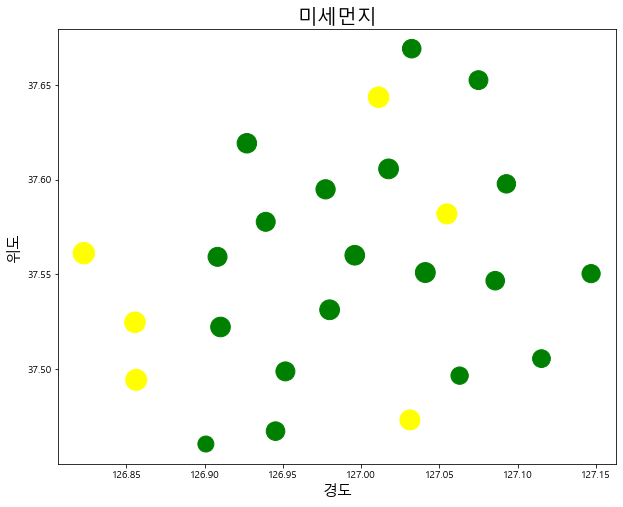

In [27]:
# 행정구역 중심 좌표(위도, 경도)를 scatter plot에 적용하여
# 각 행정구역의 미세먼지 상태를 grade의 색깔 별로 확인 가능

import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(x=air_pollution_1["경도"],
            y=air_pollution_1["위도"], 
            s = 5*air_pollution_1['평균값'], 
            c = air_pollution_1['grade'])

plt.title('미세먼지', size = 20)
plt.xlabel('경도', size = 15)
plt.ylabel('위도', size = 15)

plt.show()

In [28]:
# 22년 03/22 ~ 22년 03/23일 강남구의 하루의 대기질 확인

air_pollution_2 = air_pollution[(air_pollution['측정소 이름'] == '강남구')].loc['2022-03-22 00:00:00':'2022-03-23 00:00:00']
air_pollution_2

,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
측정일시,,,,,,,,,,,
2022-03-22,123,9,17.000000,0,0,0,강남구,37.496643,127.062988,초미세먼지,green
2022-03-22,123,6,0.037994,0,0,0,강남구,37.496643,127.062988,오존,green
2022-03-22,123,3,0.016998,0,0,0,강남구,37.496643,127.062988,이산화질소,blue
2022-03-22,123,5,0.399902,0,0,0,강남구,37.496643,127.062988,일산화탄소,blue
2022-03-22,123,8,26.000000,0,0,0,강남구,37.496643,127.062988,미세먼지,blue
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,123,1,0.003000,0,0,0,강남구,37.496643,127.062988,아황산가스,blue
2022-03-23,123,3,0.028000,0,0,0,강남구,37.496643,127.062988,이산화질소,blue
2022-03-23,123,8,34.000000,0,0,0,강남구,37.496643,127.062988,미세먼지,green


In [29]:
# pivot_table을 통해 대기 종류 별로 정리하여
# 위 표의 가독성을 올림

gangnam_pivot = pd.pivot_table(air_pollution_2, values="평균값", index="측정일시",
                               columns = '측정항목')
gangnam_pivot

측정항목,미세먼지,아황산가스,오존,이산화질소,일산화탄소,초미세먼지
측정일시,,,,,,
2022-03-22 00:00:00,26.0,0.003000,0.037994,0.016998,0.399902,17.0
2022-03-22 01:00:00,27.0,0.003000,0.032013,0.022003,0.500000,17.0
2022-03-22 02:00:00,33.0,0.003000,0.037994,0.014999,0.399902,19.0
2022-03-22 03:00:00,29.0,0.003000,0.040009,0.014000,0.399902,19.0
2022-03-22 04:00:00,31.0,0.003000,0.040985,0.016006,0.399902,18.0
2022-03-22 05:00:00,30.0,0.003000,0.022995,0.031006,0.500000,19.0
2022-03-22 06:00:00,31.0,0.003000,0.026001,0.031006,0.399902,21.0
2022-03-22 07:00:00,31.0,0.003000,0.022003,0.036011,0.399902,18.0
2022-03-22 08:00:00,35.0,0.003000,0.031006,0.026993,0.399902,19.0


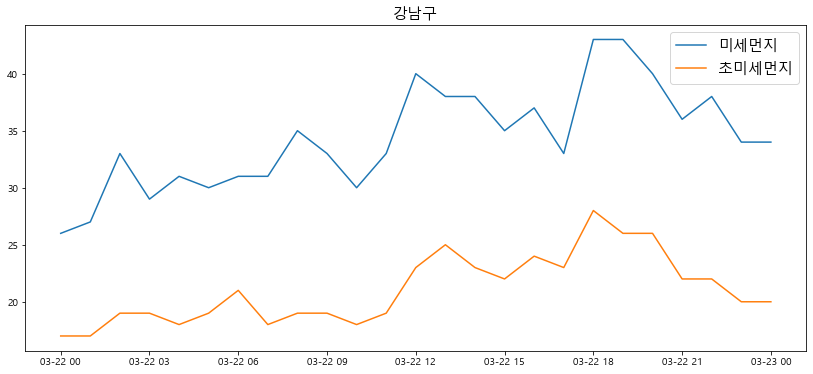

In [32]:
# gangnam_pivot을 plot에 적용하여
# 22일 ~ 23일 하루, 강남구의 미세먼지와 초미세먼지를 line plot으로 비교 가능

fig = plt.figure(figsize = (14, 6))

plt.title("강남구", fontsize=15)
plt.plot(gangnam_pivot.index, gangnam_pivot['미세먼지'], label = '미세먼지')
plt.plot(gangnam_pivot.index, gangnam_pivot['초미세먼지'], label = '초미세먼지')
plt.legend(fontsize = 15)
plt.show()

In [33]:
# 국가 기준은 초과하지 않고, 지자체에서만 조과로 인정한 데이터를 확인
# 대기 종류 중 아황산가스만 존재
# 확인 결과 아황산가스의 기준만 국가와 지자체가 다름
# 국가: 0.15ppm, 지자체: 0.12ppm
# 평균값을 보면 0.12이상 0.15이하인 데이터만 존재

air_pollution[(air_pollution['국가 기준초과 구분'] == 0) & (air_pollution['지자체 기준초과 구분'] == 1)]

,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
측정일시,,,,,,,,,,,
2020-10-15 12:00:00,101,1,0.145996,8,0,1,종로구,37.594917,126.977318,아황산가스,yellow
2020-10-23 15:00:00,124,1,0.145996,1,0,1,송파구,37.505619,127.115295,아황산가스,yellow
2020-11-02 16:00:00,118,1,0.144043,1,0,1,금천구,37.460567,126.900818,아황산가스,yellow
2020-11-03 11:00:00,112,1,0.128052,1,0,1,강북구,37.643475,127.011192,아황산가스,yellow
2020-11-03 13:00:00,101,1,0.122009,1,0,1,종로구,37.594917,126.977318,아황산가스,yellow
2020-11-03 14:00:00,101,1,0.133057,1,0,1,종로구,37.594917,126.977318,아황산가스,yellow
2020-11-04 14:00:00,109,1,0.147949,1,0,1,동대문구,37.581955,127.054848,아황산가스,yellow
2020-11-05 15:00:00,111,1,0.136963,1,0,1,성북구,37.605701,127.017578,아황산가스,yellow
2020-11-16 16:00:00,107,1,0.135986,1,0,1,성동구,37.551029,127.041061,아황산가스,yellow


In [40]:
grade_group = air_pollution.groupby(['측정기 상태', 'grade'])['grade'].count()
grade_group/(air_pollution['grade'].count().sum())

# 0.663+0.26+0.003+0.05 = 97.6

측정기 상태  grade 
0       blue      0.663022
        green     0.265091
        red       0.003467
        yellow    0.051020
1       blue      0.005739
        green     0.001272
        red       0.000644
        yellow    0.000611
2       blue      0.000237
        green     0.000036
        red       0.000000
        yellow    0.000008
4       blue      0.000872
        green     0.000019
        red       0.000000
        yellow    0.000005
8       blue      0.002395
        green     0.000169
        red       0.000058
        yellow    0.000056
9       blue      0.003917
        green     0.000725
        red       0.000295
        yellow    0.000342
Name: grade, dtype: float64

In [35]:
air_pollution_2020 = air_pollution.loc['2020-10':'2020-12'].reset_index(drop = False)
air_pollution_2020

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade
0,2020-10-01 00:00:00,117,3,0.006001,9,0,0,구로구,37.494404,126.856300,이산화질소,blue
1,2020-10-01 01:00:00,117,3,0.005001,9,0,0,구로구,37.494404,126.856300,이산화질소,blue
2,2020-10-01 01:00:00,113,8,3.000000,0,0,0,도봉구,37.669102,127.032372,미세먼지,blue
3,2020-10-01 02:00:00,117,3,0.003000,9,0,0,구로구,37.494404,126.856300,이산화질소,blue
4,2020-10-01 03:00:00,117,3,0.004002,9,0,0,구로구,37.494404,126.856300,이산화질소,blue
...,...,...,...,...,...,...,...,...,...,...,...,...
315732,2020-12-31 23:00:00,112,8,25.000000,0,0,0,강북구,37.643475,127.011192,미세먼지,blue
315733,2020-12-31 23:00:00,118,3,0.026001,0,0,0,금천구,37.460567,126.900818,이산화질소,blue
315734,2020-12-31 23:00:00,120,6,0.018005,0,0,0,동작구,37.498878,126.951645,오존,blue
315735,2020-12-31 23:00:00,115,9,19.000000,0,0,0,양천구,37.524788,126.855476,초미세먼지,green


In [36]:
air_pollution_2020['Month'] = air_pollution_2020['측정일시'].dt.month
air_pollution_2020

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,측정소 이름,위도,경도,측정항목,grade,Month
0,2020-10-01 00:00:00,117,3,0.006001,9,0,0,구로구,37.494404,126.856300,이산화질소,blue,10
1,2020-10-01 01:00:00,117,3,0.005001,9,0,0,구로구,37.494404,126.856300,이산화질소,blue,10
2,2020-10-01 01:00:00,113,8,3.000000,0,0,0,도봉구,37.669102,127.032372,미세먼지,blue,10
3,2020-10-01 02:00:00,117,3,0.003000,9,0,0,구로구,37.494404,126.856300,이산화질소,blue,10
4,2020-10-01 03:00:00,117,3,0.004002,9,0,0,구로구,37.494404,126.856300,이산화질소,blue,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315732,2020-12-31 23:00:00,112,8,25.000000,0,0,0,강북구,37.643475,127.011192,미세먼지,blue,12
315733,2020-12-31 23:00:00,118,3,0.026001,0,0,0,금천구,37.460567,126.900818,이산화질소,blue,12
315734,2020-12-31 23:00:00,120,6,0.018005,0,0,0,동작구,37.498878,126.951645,오존,blue,12
315735,2020-12-31 23:00:00,115,9,19.000000,0,0,0,양천구,37.524788,126.855476,초미세먼지,green,12


In [37]:
air_pollution_2020.loc[air_pollution_2020['평균값'] < 0, '평균값'] = 0

In [38]:
pd.set_option('display.max_rows', None)

air_pollution_2020.groupby(['Month', '측정항목', 'grade']).agg({'평균값':['mean', 'min', 'max'], 'grade':['count']})

평균값                           grade
                          mean         min          max  count
Month 측정항목  grade                                             
10    미세먼지  blue     20.906250    0.000000    29.000000   7989
            green    44.125000   30.000000    79.000000   7326
            red     437.000000  150.000000  1985.000000     77
            yellow   98.125000   80.000000   149.000000    602
      아황산가스 blue      0.003325    0.000000     0.018997  15921
            green     0.028473    0.020004     0.046997     21
            red       0.236328    0.151978     0.382080     11
            yellow    0.092590    0.064026     0.145996     24
      오존    blue      0.012794    0.000000     0.029007  11647
            green     0.039948    0.029999     0.085022   4318
            red       0.251465    0.182983     0.347900      7
            yellow    0.121582    0.091980     0.142944      5
      이산화질소 blue      0.016235    0.000000     0.029007   9931
            green     0.040833    0.029999     0.058990   5710
            red            NaN         NaN          NaN      0
            yellow    0.066406    0.059998     0.096008    442
      일산화탄소 blue      0.497803    0.000000     1.500000  15937
            green     5.867188    2.500000     8.398438     16
            red      23.062500   15.398438    37.593750     12
            yellow   10.414062    9.203125    14.703125     12
      초미세먼지 blue      9.312500    0.000000    14.000000   8611
            green    21.734375   15.000000    34.000000   5671
            red     358.750000   75.000000   985.000000     99
            yellow   46.500000   35.000000    74.000000   1598
11    미세먼지  blue     21.796875    0.000000    29.000000   7315
            green    48.312500   30.000000    79.000000   9120
            red     513.500000  150.000000  1985.000000     51
            yellow   96.375000   80.000000   148.000000   1540
      아황산가스 blue      0.003481    0.000000     0.018997  17964
            green     0.034698    0.020004     0.049011     13
            red       0.225342    0.152954     0.379883     11
            yellow    0.097839    0.049988     0.147949     36
      오존    blue      0.012749    0.000000     0.029007  16428
            green     0.038208    0.029999     0.083984   1586
            red       0.245850    0.162964     0.337891      8
            yellow    0.102661    0.098022     0.106995      3
      이산화질소 blue      0.016830    0.000000     0.029007   9719
            green     0.042023    0.029999     0.058990   7121
            red            NaN         NaN          NaN      0
            yellow    0.068848    0.059998     0.156006   1185
      일산화탄소 blue      0.564941    0.000000     1.799805  17979
            green     5.683594    2.300781     8.796875     22
            red      22.703125   15.796875    38.406250      6
            yellow   12.664062   11.000000    14.601562     18
      초미세먼지 blue      9.375000    0.000000    14.000000   6233
            green    21.812500   15.000000    34.000000   7316
            red     180.125000   75.000000  1543.000000    197
            yellow   46.250000   35.000000    74.000000   4279
12    미세먼지  blue     22.265625    0.000000    29.000000   6812
            green    46.781250   30.000000    79.000000  10333
            red     441.000000  162.000000  1985.000000     28
            yellow   96.125000   80.000000   142.000000   1427
      아황산가스 blue      0.003664    0.000000     0.014999  18553
            green     0.032166    0.024002     0.045013     12
            red       0.167603    0.151001     0.178955      3
            yellow    0.091736    0.053986     0.149048     32
      오존    blue      0.012802    0.000000     0.029007  17056
            green     0.033569    0.029999     0.088989   1533
            red            NaN         NaN          NaN      0
            yellow    0.112244    0.090027     0.147949     11
      이산화질소 blue      0.017929    0.000000     0.029007   